# 梯度下降 (Gradient descent)

In [0]:
#@title 梯度下降 { display-mode: "both" }
# Gradient descent
# 本程序实现通过梯度下降法寻找 Rosenbrock 函数的极小值点
# 可选 Rosenbrock 函数由公式 (a-x)**2+b*(y-x**2)**2 决定，代码内设置: a=1., b=1.
# 给出了步长的 4 种策略：strategy1-strategy4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [0]:
#@markdown - **计时装饰器**
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        t = end_time - start_time
        print('    Running time is: {:.4f} s.'.format(t))
        return result
    return wrapper

## 类的定义

In [0]:
#@markdown - **梯度下降算法类**
class Strategy:
    def __init__(self, name='strategy1', lr_max=1e-1, lr_min=1e-3, max_iters=None, tol=1e-6):
        self.name = name
        self.lr_max = lr_max
        self.lr_min = lr_min
        self.max_iters = max_iters
        self.iters = 0
        self.tol = tol

    def rosenbrock(self, x, y, a=1., b=1.): # 原函数
        return (a - x)**2 + b * (y - x**2)**2

    def rosenbrock_grad(self, x, y, a=1., b=1.): # 梯度计算式
        x_d = 2 * (x - a) - 4 * b * x * (y - x**2)
        y_d = 2 * b * (y - x**2)
        return np.array([x_d, y_d])

    def strategy_step(self, grad, last_grad=None):
        if self.name == 'strategy1':
            eta = -self.lr_min * grad  # 固定步长 lr_min
        elif self.name == 'strategy2':
            eta = -self.lr_max * grad # 固定步长 lr_max
        elif self.name == 'strategy3':
            eta = -self.lr_max * ((1 - 0.1) * grad + 0.1 * last_grad) # 固定步长 lr_max ，以 0.1 为系数加入冲量
        else:
            eta = -max(self.lr_max * 0.9**self.iters, self.lr_min) * grad # 初始步长为 lr_max，以 0.9 为衰减因子衰减步长。保障步长大于等于 lr_min
        return eta

    #@markdown - **根据路径画出 3D 示意图**
    def draw_chart(self, path, ax, x_lim=[-2., 2], y_lim=[-2, 2], d_off=-1.5):
        x, y = np.meshgrid(np.arange(x_lim[0], x_lim[1], 0.1),
                            np.arange(y_lim[0], y_lim[1], 0.1))
        z = self.rosenbrock(x, y)
        ax.plot_surface(x, y, z, rstride=2, cstride=2, alpha=0.6, cmap=cm.jet)
        # ax.contourf(x, y, z,zdir='z', offset=d_off, cmap=cm.coolwarm) # 显示等高平面
        ax.set_xlabel('X', fontsize=14)
        ax.set_ylabel('Y', fontsize=14)
        ax.set_zlabel('Z', fontsize=14)
        # ax.set_zlim([-800.0,2500.0])
        ax.view_init(elev=27, azim=65)
        # z_labels = self.rosenbrock(np.array(path[0]), np.array(path[1]))
        z_path = self.rosenbrock(np.array(path[0]), np.array(path[1]))
        if path is not None:
            ax.plot(path[0], path[1], z_path, c="#b22222", linewidth=1.)
            # ax.plot(path[0], path[1], z_labels, c="#b22222", linewidth=1.)
            ax.scatter(path[0][0], path[1][0], z_path[0], c='r', s=30, marker='o')
            ax.scatter(path[0][-1], path[1][-1], z_path[-1], c='r', s=30, marker='*')
        ax.set_xlim(x_lim), ax.set_ylim(y_lim)
        ax.set_xticks(np.linspace(-2., 2., 5, endpoint=True))
        ax.set_yticks(np.linspace(-2., 2., 5, endpoint=True))
        ax.tick_params(labelsize=14)
    
    #@markdown - **梯度下降算法**
    @timer
    def gradient_descent(self, init_position):
        x = [init_position[0]]
        y = [init_position[1]]
        last_grad = np.array([0.0, 0.0])
        while True:
            cx = x[-1]
            cy = y[-1]
            grad = self.rosenbrock_grad(cx, cy)
            step = self.strategy_step(grad, last_grad) # 由 strategy 决定步长
            x.append(cx + step[0])
            y.append(cy + step[1])
            last_grad = grad
            self.iters += 1
            # magnitude = np.sqrt(np.dot(grad, grad))
            magnitude = abs((1 - cx) * (1 - cy))
            if magnitude < self.tol or (self.max_iters is not None and self.iters >= self.max_iters):
                break
        return {'final_pos': [x[-1], y[-1]], 'iters': self.iters, 'final_grad': grad, 'path': [x, y]}

## Strategy-1

In [0]:
# gradient_descent.py 有更简洁的画图代码
strategy_name = 'strategy1'
init_position = [-1.5, -1.5] # 初始点位置
s = Strategy(strategy_name)
s.__dict__

{'iters': 0,
 'lr_max': 0.1,
 'lr_min': 0.001,
 'max_iters': None,
 'name': 'strategy1',
 'tol': 1e-06}

Strategy1
    Running time is: 0.1481 s.
    Location of the final point: 
    x=0.9994, y=0.9984


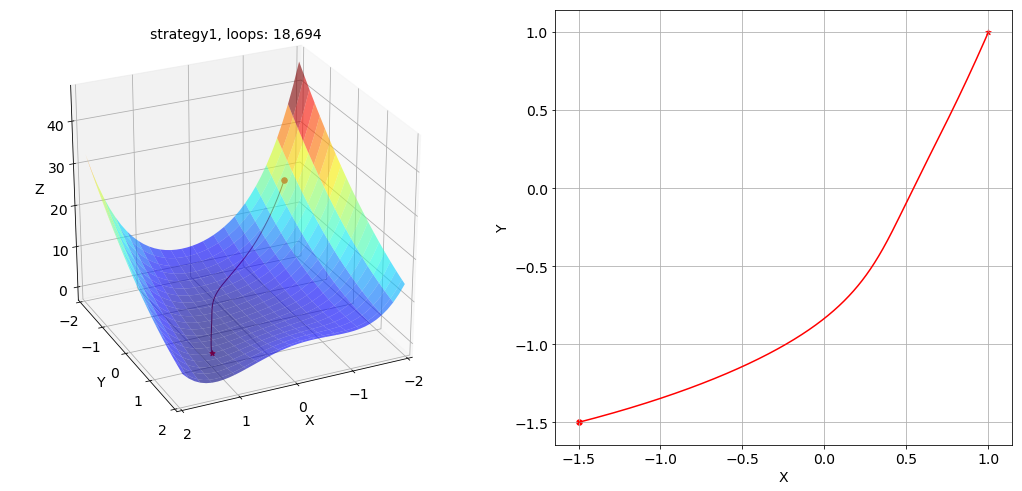

In [0]:
print(strategy_name.capitalize())
fig = plt.figure(1, figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
result = s.gradient_descent(init_position)
s.draw_chart(result['path'], ax1)
ax1.set_title('{}, loops: {:,}'.format(strategy_name, result['iters']), fontsize=14)
x_loc,y_loc = result['final_pos']
print('    Location of the final point: \n    x={:.4f}, y={:.4f}'.format(x_loc, y_loc)) 

ax2 = fig.add_subplot(122) # 显示路径
x_path,y_path = result['path']
ax2.plot(x_path, y_path,'r')
ax2.scatter(x_path[0], y_path[0], c='r', s=30, marker='o')
ax2.scatter(x_path[-1], y_path[-1], c='r', s=30, marker='*')
ax2.set_xlabel('X', fontsize=14), ax2.set_ylabel('Y', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.grid(b=True)

## Strategy-2

In [0]:
strategy_name = 'strategy2'
s = Strategy(strategy_name)
s.__dict__

{'iters': 0,
 'lr_max': 0.1,
 'lr_min': 0.001,
 'max_iters': None,
 'name': 'strategy2',
 'tol': 1e-06}

Strategy2
    Running time is: 0.0016 s.
    Location of the final point: 
    x=0.9994, y=0.9985


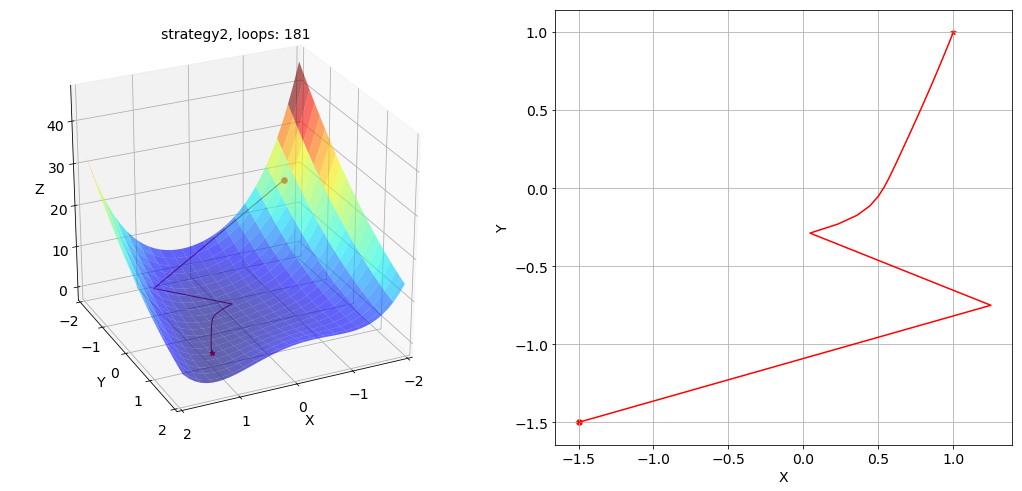

In [0]:
print(strategy_name.capitalize())
fig = plt.figure(1, figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
result = s.gradient_descent(init_position)
s.draw_chart(result['path'], ax1)
ax1.set_title('{}, loops: {:,}'.format(strategy_name, result['iters']), fontsize=14)
x_loc,y_loc = result['final_pos']
print('    Location of the final point: \n    x={:.4f}, y={:.4f}'.format(x_loc, y_loc)) 

ax2 = fig.add_subplot(122) # 显示路径
x_path,y_path = result['path']
ax2.plot(x_path, y_path,'r')
ax2.scatter(x_path[0], y_path[0], c='r', s=30, marker='o')
ax2.scatter(x_path[-1], y_path[-1], c='r', s=30, marker='*')
ax2.set_xlabel('X', fontsize=14), ax2.set_ylabel('Y', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.grid(b=True)

## Strategy-3

In [0]:
strategy_name = 'strategy3'
s = Strategy(strategy_name)
s.__dict__

{'iters': 0,
 'lr_max': 0.1,
 'lr_min': 0.001,
 'max_iters': None,
 'name': 'strategy3',
 'tol': 1e-06}

Strategy3
    Running time is: 0.0028 s.
    Location of the final point: 
    x=0.9994, y=0.9985


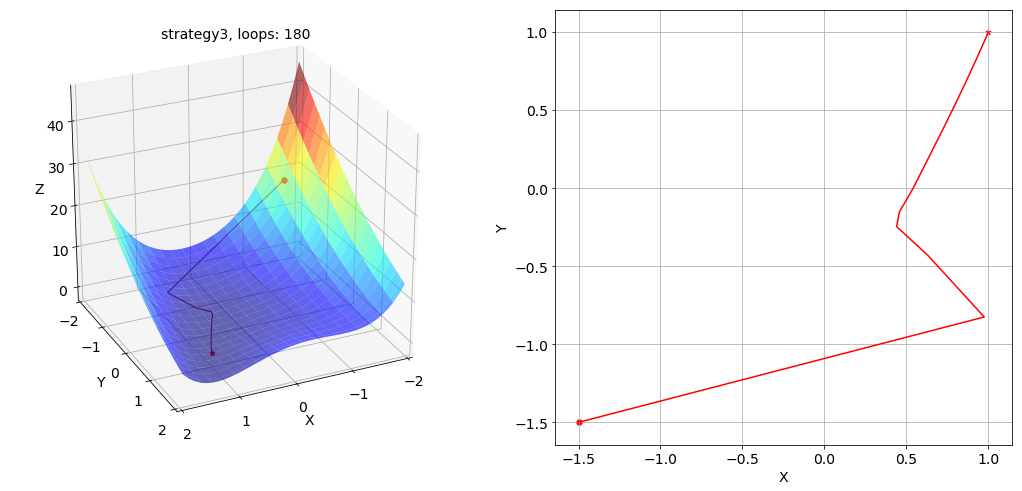

In [0]:
print(strategy_name.capitalize())
fig = plt.figure(1, figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
result = s.gradient_descent(init_position)
s.draw_chart(result['path'], ax1)
ax1.set_title('{}, loops: {:,}'.format(strategy_name, result['iters']), fontsize=14)
x_loc,y_loc = result['final_pos']
print('    Location of the final point: \n    x={:.4f}, y={:.4f}'.format(x_loc, y_loc)) 

ax2 = fig.add_subplot(122) # 显示路径
x_path,y_path = result['path']
ax2.plot(x_path, y_path,'r')
ax2.scatter(x_path[0], y_path[0], c='r', s=30, marker='o')
ax2.scatter(x_path[-1], y_path[-1], c='r', s=30, marker='*')
ax2.set_xlabel('X', fontsize=14), ax2.set_ylabel('Y', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.grid(b=True)

## Strategy-4

In [0]:
strategy_name = 'strategy4'
s = Strategy(strategy_name)
s.__dict__

{'iters': 0,
 'lr_max': 0.1,
 'lr_min': 0.001,
 'max_iters': None,
 'name': 'strategy4',
 'tol': 1e-06}

Strategy4
    Running time is: 0.1627 s.
    Location of the final point: 
    x=0.9994, y=0.9984


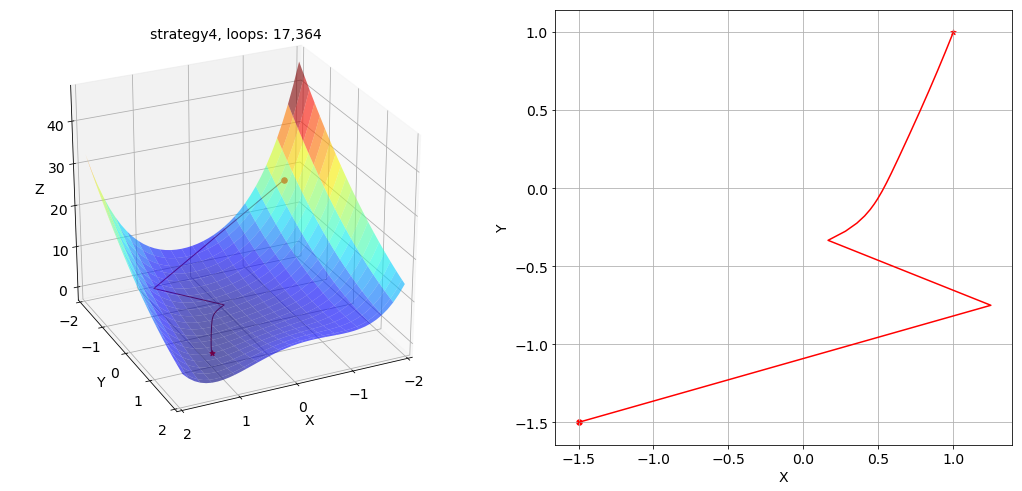

In [0]:
print(strategy_name.capitalize())
fig = plt.figure(1, figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
result = s.gradient_descent(init_position)
s.draw_chart(result['path'], ax1)
ax1.set_title('{}, loops: {:,}'.format(strategy_name, result['iters']), fontsize=14)
x_loc,y_loc = result['final_pos']
print('    Location of the final point: \n    x={:.4f}, y={:.4f}'.format(x_loc, y_loc)) 

ax2 = fig.add_subplot(122) # 显示路径
x_path,y_path = result['path']
ax2.plot(x_path, y_path,'r')
ax2.scatter(x_path[0], y_path[0], c='r', s=30, marker='o')
ax2.scatter(x_path[-1], y_path[-1], c='r', s=30, marker='*')
ax2.set_xlabel('X', fontsize=14), ax2.set_ylabel('Y', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.grid(b=True)

## Strategy(1-4)

Strategy1
    Running time is: 0.1425 s.
    Location of the final point: 
    x=0.9994, y=0.9984
Strategy2
    Running time is: 0.0016 s.
    Location of the final point: 
    x=0.9994, y=0.9985
Strategy3
    Running time is: 0.0023 s.
    Location of the final point: 
    x=0.9994, y=0.9985
Strategy4
    Running time is: 0.1500 s.
    Location of the final point: 
    x=0.9994, y=0.9984


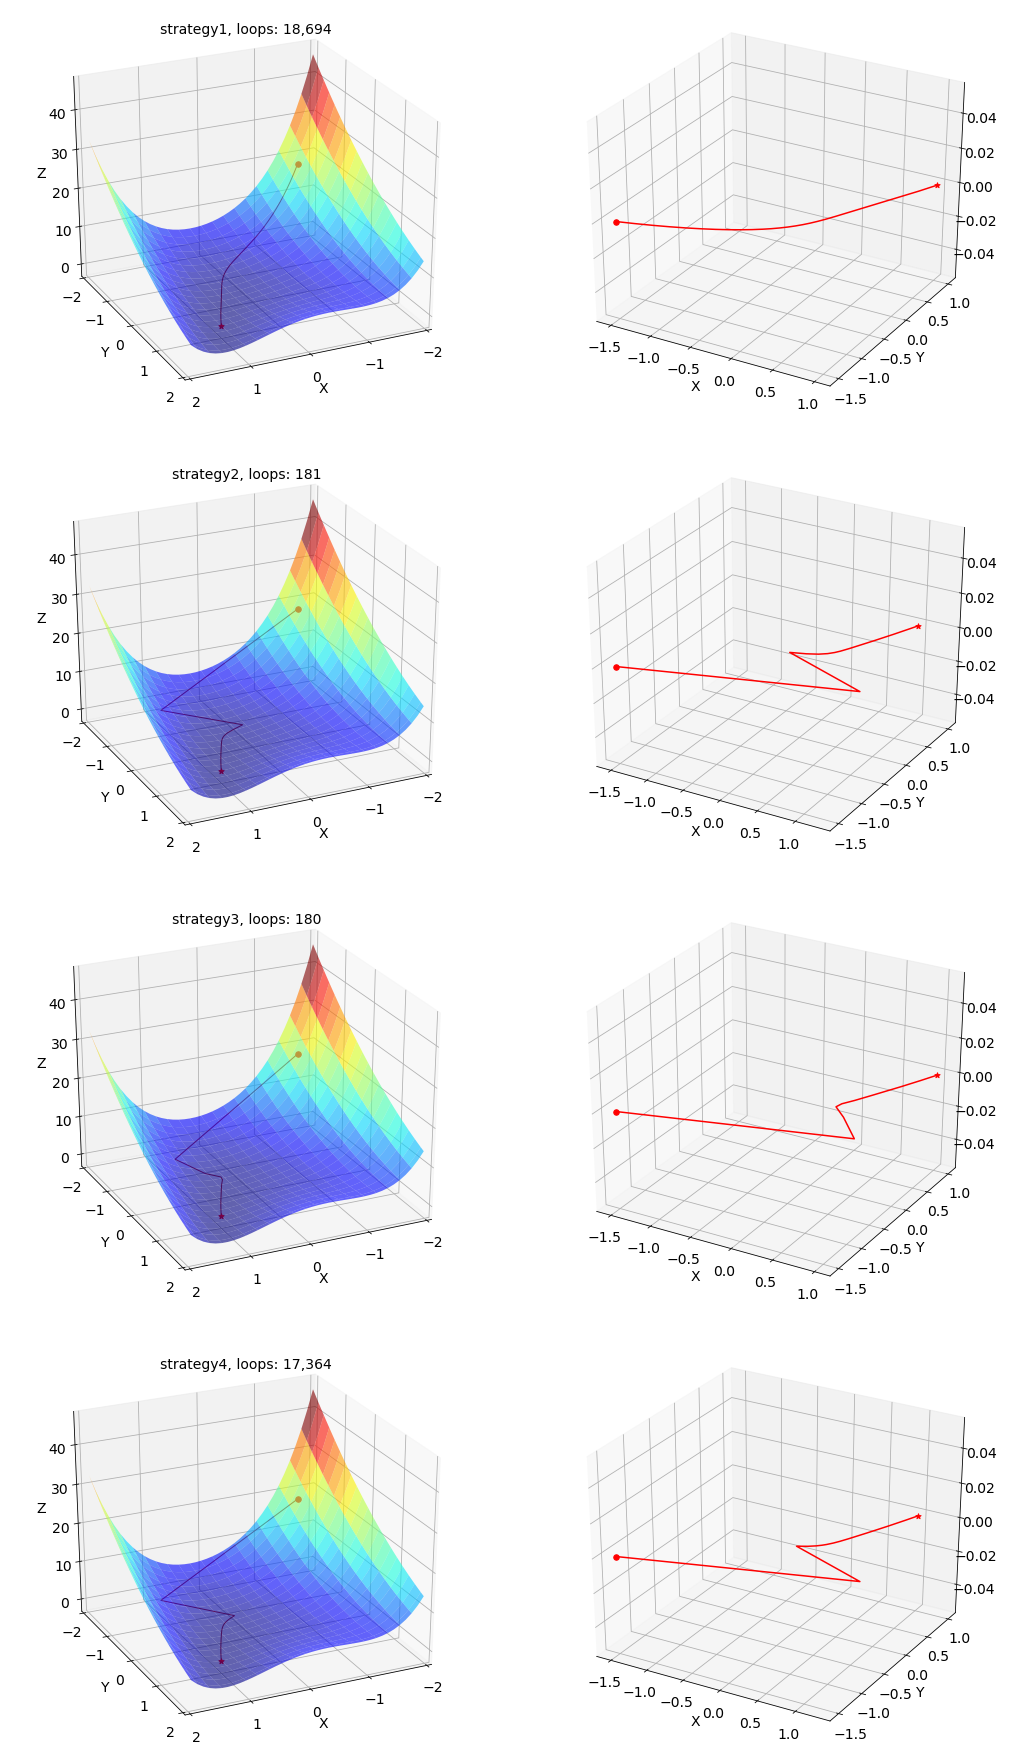

In [0]:
#@markdown - **所有结果显示在一张图上**
strategy_name = ['strategy1', 'strategy2', 'strategy3', 'strategy4']
fig, AX = plt.subplots(nrows=4, ncols=2, figsize=(18, 32), subplot_kw=dict(projection='3d'))
fig.subplots_adjust(hspace=.1, wspace=.1)
for name, ax1, ax2 in zip(strategy_name, AX[:, 0], AX[:, 1]):
    print(name.capitalize())
    s = Strategy(name)
    result = s.gradient_descent(init_position)
    s.draw_chart(result['path'], ax1)
    ax1.set_title('{}, loops: {:,}'.format(name, result['iters']), fontsize=14)
    x_loc,y_loc = result['final_pos']
    print('    Location of the final point: \n    x={:.4f}, y={:.4f}'.format(x_loc, y_loc)) 

    x_path,y_path = result['path']
    ax2.plot(x_path, y_path,'r')
    ax2.scatter(x_path[0], y_path[0], c='r', s=30, marker='o')
    ax2.scatter(x_path[-1], y_path[-1], c='r', s=30, marker='*')
    ax2.set_xlabel('X', fontsize=14), ax2.set_ylabel('Y', fontsize=14)
    ax2.tick_params(labelsize=14)
#     ax2.view_init(elev=90, azim=-90)
    ax2.grid(b=True)
plt.show()
